In [152]:
import os
import warnings

warnings.filterwarnings('ignore')
os.chdir('C:/MSBA/Summer 2020/2205-INSY-5378-Data Science/Assignment 3/Classification')

In [153]:
import pandas as pd
import numpy as np

#pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', -1)

data_df = pd.read_csv('bank.csv', sep = ';')
data_copy = data_df.copy()
print('Shape: ', data_df.shape)
data_df 

Shape:  (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [154]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [155]:
data_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [156]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


Regarding duration (last contact duration, in seconds) column. 

Note: the duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [157]:
# checking to see if the duration column has zero values, indicating whether the customer was called
duration_check = data_df.loc[data_df['duration'] == 0, 'y']
print(duration_check)

# although this field doesn't have any zero values, 
# I chose to drop this column in the interest of building a true predictive model

data_df = data_df.drop('duration', axis = 1)
print('Shape: ', data_df.shape)

Series([], Name: y, dtype: object)
Shape:  (4521, 16)


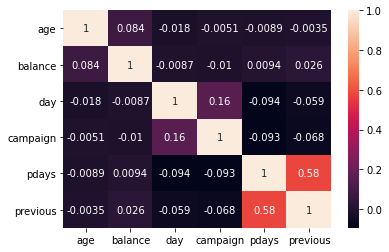

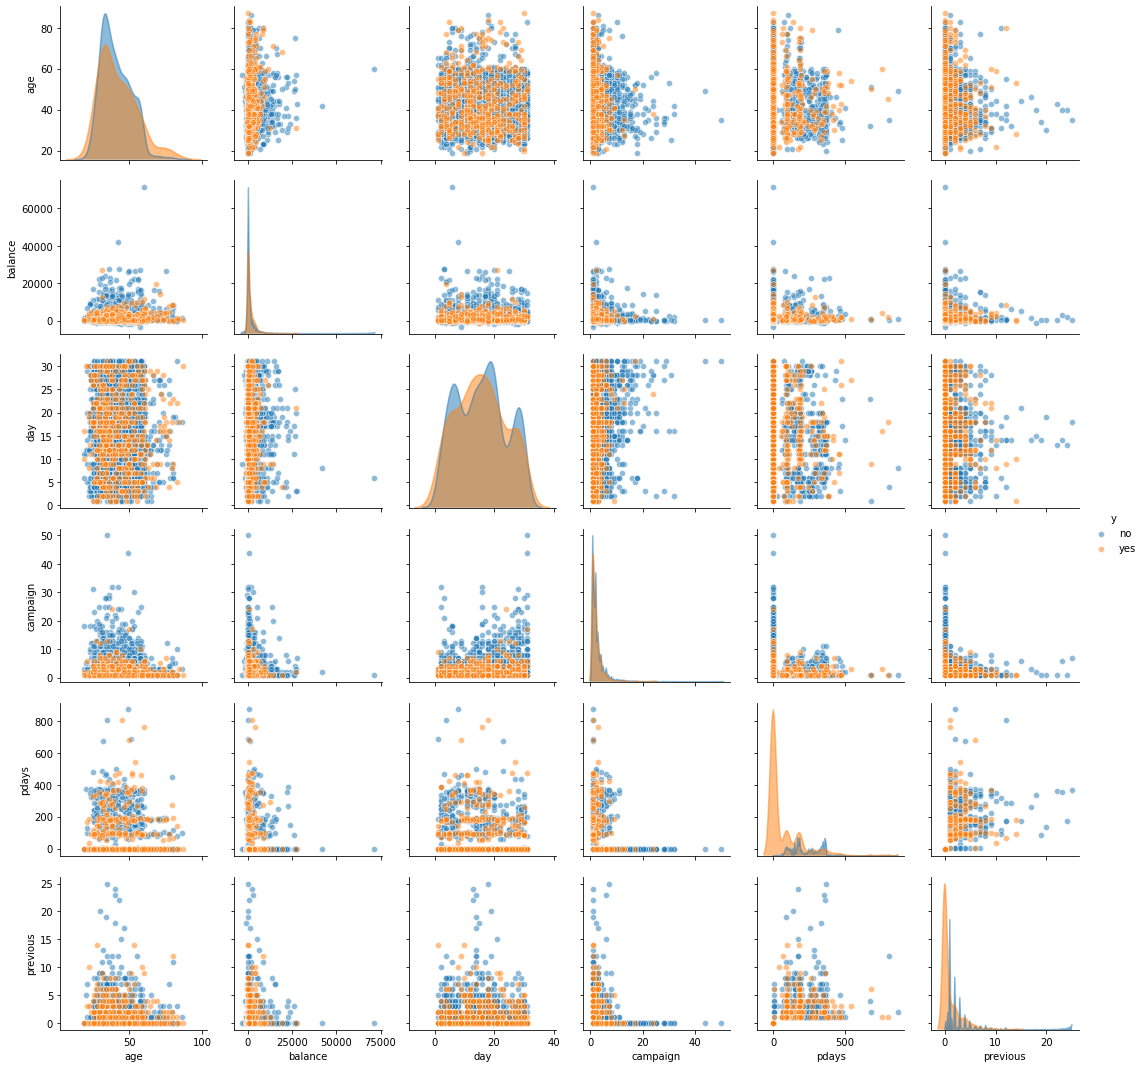

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data_df.corr(), annot=True)
sns.pairplot(data_df, diag_kind ='kde', hue = 'y', diag_kws={'alpha':0.5}, plot_kws={'alpha':0.5})
plt.show()

In [159]:
features_cat = data_df.select_dtypes(include='object').columns

for col in features_cat:
    print('\n{} has {} unique values: \n{}'.format(col, data_df[col].nunique(), data_df[col].unique()))


job has 12 unique values: 
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital has 3 unique values: 
['married' 'single' 'divorced']

education has 4 unique values: 
['primary' 'secondary' 'tertiary' 'unknown']

default has 2 unique values: 
['no' 'yes']

housing has 2 unique values: 
['no' 'yes']

loan has 2 unique values: 
['no' 'yes']

contact has 3 unique values: 
['cellular' 'unknown' 'telephone']

month has 12 unique values: 
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

poutcome has 4 unique values: 
['unknown' 'failure' 'other' 'success']

y has 2 unique values: 
['no' 'yes']


In [160]:
# Encode the target variable 
data_df['y'] = data_df['y'].map({"no": 0,'yes':1}) 
data_df['y'].value_counts()

0    4000
1    521 
Name: y, dtype: int64

Encoding below set of features assuming ordinality per domain knowledge

__Note:__ tried one hot encoding but model accuracy was impacted

In [161]:
# ranking single more over married and divorce
data_df['marital'] = data_df['marital'].map({'divorced': 1,'married':2,'single':3}) 

# ranking tertiary as highest
data_df['education'] = data_df['education'].map({'unknown': 1,'primary': 2,'secondary': 3, 'tertiary': 4}) 

# ranking cellular highest as chances of reaching customer are higher 
data_df['contact'] = data_df['contact'].map({'unknown': 1,'telephone': 2,'cellular': 3}) 

# ranking poutcome based on the campaign outcome
data_df['poutcome'] = data_df['poutcome'].map({'failure': 1, 'unknown': 2,'other': 3,'success': 4}) 

# ranking jobs as per common knowledge
job_rank = {'unemployed': 1, 'unknown': 2, 'student': 3, 'retired': 4, 'housemaid': 5,  
            'blue-collar': 6, 'self-employed': 7, 'services': 8, 'admin.': 9,  
            'technician': 10, 'entrepreneur': 11, 'management': 12}

data_df['job'] = data_df['job'].map(job_rank) 

Binning below set of features for one hot encoding, as label encoding them doesnt make sense

In [162]:
# bin months of the year as per quarters 
month_quarter = {'jan': 1, 'feb':1, 'mar': 1, 
                 'apr': 2, 'may':2, 'jun': 2, 
                 'jul': 3, 'aug':3, 'sep': 3,
                 'oct': 4, 'nov':4, 'dec': 4}

data_df['month'] = data_df['month'].map(month_quarter).astype('category') 

# bin the days of month into two (bi-monthly)
data_df['day'] = pd.cut(data_df['day'], [1,15,31], include_lowest = True)

# bin pdays quarterly 
data_df['pdays'] = pd.cut(data_df['pdays'], [-1,0,90,181,273,365], include_lowest = True)

# bin age into categories -> single, married, family, independent (children out of home), retired
data_df['age'] = pd.cut(data_df['age'], [18,24,32,50,60,100], include_lowest = True)

In [163]:
# one hot encode all the categorical variables and the ones which were binned above
data_one_hot = pd.get_dummies(data_df, drop_first = True)
print('\nShape: ', data_one_hot.shape)

data_one_hot


Shape:  (4521, 24)


,job,marital,education,balance,contact,campaign,previous,poutcome,y,"age_(24.0, 32.0]","age_(32.0, 50.0]","age_(50.0, 60.0]","age_(60.0, 100.0]",default_yes,housing_yes,loan_yes,"day_(15.0, 31.0]",month_2,month_3,month_4,"pdays_(0.0, 90.0]","pdays_(90.0, 181.0]","pdays_(181.0, 273.0]","pdays_(273.0, 365.0]"
0,1,2,2,1787,3,1,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,8,2,3,4789,3,1,4,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1
2,12,3,4,1350,3,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1
3,12,2,4,1476,1,4,0,2,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
4,6,2,3,0,1,1,0,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,8,2,3,-333,3,5,0,2,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
4517,7,2,4,-3313,1,1,0,2,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0
4518,10,2,3,295,3,11,0,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4519,6,2,3,1137,3,4,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [164]:
data_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 24 columns):
job                     4521 non-null int64
marital                 4521 non-null int64
education               4521 non-null int64
balance                 4521 non-null int64
contact                 4521 non-null int64
campaign                4521 non-null int64
previous                4521 non-null int64
poutcome                4521 non-null int64
y                       4521 non-null int64
age_(24.0, 32.0]        4521 non-null uint8
age_(32.0, 50.0]        4521 non-null uint8
age_(50.0, 60.0]        4521 non-null uint8
age_(60.0, 100.0]       4521 non-null uint8
default_yes             4521 non-null uint8
housing_yes             4521 non-null uint8
loan_yes                4521 non-null uint8
day_(15.0, 31.0]        4521 non-null uint8
month_2                 4521 non-null uint8
month_3                 4521 non-null uint8
month_4                 4521 non-null uint8
pdays_(0.0, 9

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

features = data_one_hot.drop('y', axis = 1)     # note that features is dataframe
target = data_one_hot['y']                      # note that target is series

oversampler = SMOTE(random_state = 337)
features_os, target_os = oversampler.fit_sample(features, target)
print('Binary counts of over sampled target set:{} \n'.format(np.bincount(target_os)))

x_train, x_test, y_train, y_test = \
                    train_test_split(features_os, target_os, test_size = 0.20, stratify = target_os, random_state = 32)

print('x_train shape :', x_train.shape)
print('x_test shape  :', x_test.shape)
print('y_train shape and target counts: {} {}'.format(y_train.shape, np.bincount(y_train)))
print('y_test shape and target counts: {} {}'.format(y_test.shape, np.bincount(y_test)))

Binary counts of over sampled target set:[4000 4000] 

x_train shape : (6400, 23)
x_test shape  : (1600, 23)
y_train shape and target counts: (6400,) [3200 3200]
y_test shape and target counts: (1600,) [800 800]


In [165]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

features = data_one_hot.drop('y', axis = 1)     # note that features is dataframe
target = data_one_hot['y']                      # note that target is series

x_train_temp, x_test, y_train_temp, y_test = \
                             train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 32)

oversampler = SMOTE(random_state = 338)
x_train, y_train = oversampler.fit_sample(x_train_temp, y_train_temp)
print('Binary counts of over sampled target set:{} \n'.format(np.bincount(y_train)))

print('x_train shape :', x_train.shape)
print('x_test shape  :', x_test.shape)
print('y_train shape and target counts: {} {}'.format(y_train.shape, np.bincount(y_train)))
print('y_test shape and target counts: {} {}'.format(y_test.shape, np.bincount(y_test)))

Binary counts of over sampled target set:[3199 3199] 

x_train shape : (6398, 23)
x_test shape  : (905, 23)
y_train shape and target counts: (6398,) [3199 3199]
y_test shape and target counts: (905,) [801 104]


In [166]:
def report_metrics(y_test, y_pred, y_pred_prob):
    #print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_pred, target_names = ['No', 'Yes']))
     
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    area = auc(recall, precision)

    plt.plot(recall, precision, label = 'P-R curve')
    plt.legend(loc = 'lower left')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.1, 1.0])
    plt.ylim([0.1, 1.1])
    plt.title('P-R curve with Area Under Curve: {:0.2f}'.format(area))
    plt.show()

In [167]:
def models_baseline(x_train, y_train, x_test, y_test, models): 
    base_models = []
    for model_name, model, parameter in models:               
        model_base = model
        model_base.fit(x_train, y_train)

        print('{}: '.format(model_name))
        print('Accuracy on Training set: {:.3f}'.format(model_base.score(x_train, y_train)))
        print('Accuracy on Test set: {:.3f}'.format(model_base.score(x_test, y_test)))

        y_pred = model_base.predict(x_test)
        y_pred_prob = model_base.predict_proba(x_test)[:, 1]

        report_metrics(y_test, y_pred, y_pred_prob)
        base_models.append(model_base)
    
    return(base_models)

In [168]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

model_lr = LogisticRegression(random_state = 337, max_iter = 10000)
model_dt = DecisionTreeClassifier(random_state = 337)
model_rfc = RandomForestClassifier(n_jobs = -1, random_state = 337)
model_xgb = XGBClassifier(n_jobs = -1, random_state = 337, verbosity = 0)

lr_param = {'C': np.logspace(-5, 8, 15), 'penalty': ['l1','l2'], 'solver': ['liblinear']}

dt_param = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(4,10,1))}

rfc_param = {'n_estimators': list(range(10,101,10)), 'max_features': list(range(5,24,1)), 
             'criterion': ['gini', 'entropy'], 'oob_score': [True, False], 'max_depth': list(range(5,9,1))}

xgb_param = {'n_estimators': list(range(10,101,10)), 'learning_rate': np.linspace(0.01,0.5,10),
             'max_depth': list(range(3,5,1))}

models = [('Logistic Regression', model_lr, lr_param), 
          ('Decision Tree', model_dt, dt_param), 
          ('Random Forest', model_rfc, rfc_param), 
          ('XGBoost', model_xgb, xgb_param)]

Summary for Baseline models: 

Logistic Regression: 
Accuracy on Training set: 0.877
Accuracy on Test set: 0.829

Confusion Matrix:
 [[728  73]
 [ 82  22]]

Classification Report:
                precision    recall  f1-score   support

          No       0.90      0.91      0.90       801
         Yes       0.23      0.21      0.22       104

    accuracy                           0.83       905
   macro avg       0.57      0.56      0.56       905
weighted avg       0.82      0.83      0.83       905



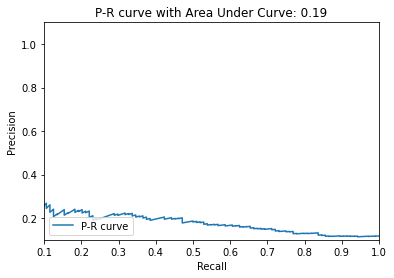

Decision Tree: 
Accuracy on Training set: 1.000
Accuracy on Test set: 0.796

Confusion Matrix:
 [[682 119]
 [ 66  38]]

Classification Report:
                precision    recall  f1-score   support

          No       0.91      0.85      0.88       801
         Yes       0.24      0.37      0.29       104

    accuracy                           0.80       905
   macro avg       0.58      0.61      0.59       905
weighted avg       0.83      0.80      0.81       905



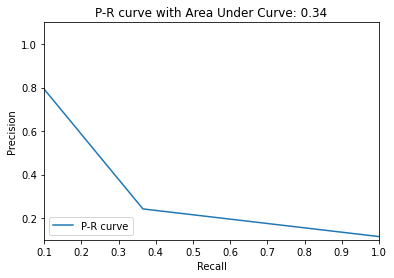

Random Forest: 
Accuracy on Training set: 1.000
Accuracy on Test set: 0.856

Confusion Matrix:
 [[745  56]
 [ 74  30]]

Classification Report:
                precision    recall  f1-score   support

          No       0.91      0.93      0.92       801
         Yes       0.35      0.29      0.32       104

    accuracy                           0.86       905
   macro avg       0.63      0.61      0.62       905
weighted avg       0.85      0.86      0.85       905



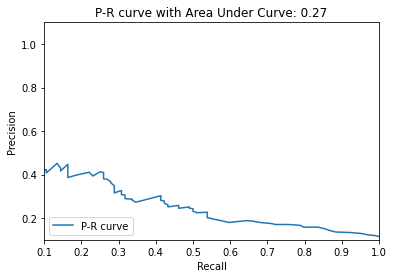

XGBoost: 
Accuracy on Training set: 0.979
Accuracy on Test set: 0.863

Confusion Matrix:
 [[757  44]
 [ 80  24]]

Classification Report:
                precision    recall  f1-score   support

          No       0.90      0.95      0.92       801
         Yes       0.35      0.23      0.28       104

    accuracy                           0.86       905
   macro avg       0.63      0.59      0.60       905
weighted avg       0.84      0.86      0.85       905



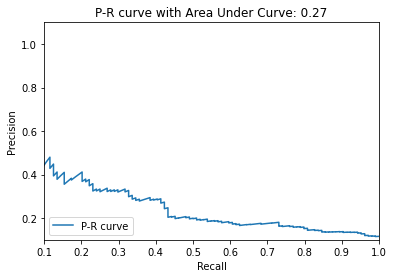

In [169]:
print('Summary for Baseline models: \n')
base_models = models_baseline(x_train.values, y_train, x_test.values, y_test, models)

# due to binning, dataframe columns have these values in column names "[, ] or <"
# XGBoost is throwing error -> feature_names must be string, and may not contain [, ] or <
# hence passing the dataframe as arrays instead 

In [170]:
# let us look at the depths of the trees used in Decision Tree, Random Forest
# This could be one of the reason for overfitting

print('Decision Tree depth:', base_models[1].tree_.max_depth)
print('Random Forest Average Tree depth:',
      round(np.mean([estimator.tree_.max_depth for estimator in base_models[2].estimators_])))

Decision Tree depth: 26
Random Forest Average Tree depth: 25


__Observations on Baseline models__: 
 - Overall accuracies are near to baseline 88% (based on class imbalance), however all models have to improve on F1 score (Precision / Recall)

__Logistic Regression__: 
 - Accuracy: 89% , F1: 85%
 - No overfitting observed 

__Decision Tree__: 
 - Accuracy: 81% , F1: 81%
 - Very high overfitting observed
 
__Random Forest__: 
 - Accuracy: 89% , F1: 86%
 - High overfitting observed
 
__XGBoost__: 
 - Accuracy: 88% , F1: 86%
 - Medium overfitting observed 

In [171]:
def models_tuned(x_train, y_train, x_test, y_test, models): 
    tuned_models = []
    for model_name, model, parameter in models: 
        
        # Create the RandomizedSearchCV object: model_cv
        model_cv = RandomizedSearchCV(estimator = model, param_distributions = parameter, 
                                      cv = 5, random_state = 32)
        # Fit to the training set
        model_cv.fit(x_train, y_train)
        
        # Compute and print the metrics
        print('{}:'.format(model_name))
        print("Tuned best Hyper Parameters: \n{}".format(model_cv.best_params_))
        print("\nAccuracy on Training set: {:.3f}".format(model_cv.score(x_train, y_train)))
        print("Accuracy on Test set: {:.3f}".format(model_cv.score(x_test, y_test)))

        # Predit on the test set using best parameters 
        y_pred = model_cv.predict(x_test)
        y_pred_prob = model_cv.predict_proba(x_test)[:,1]

        # Generate the metrics to evaluate model performance
        report_metrics(y_test, y_pred, y_pred_prob)
        
        tuned_models.append(model_cv)
        
    return(tuned_models)

Summary for Hyper Parameters tuned models: 

Logistic Regression:
Tuned best Hyper Parameters: 
{'solver': 'liblinear', 'penalty': 'l2', 'C': 31.622776601683793}

Accuracy on Training set: 0.877
Accuracy on Test set: 0.824

Confusion Matrix:
 [[727  74]
 [ 85  19]]

Classification Report:
                precision    recall  f1-score   support

          No       0.90      0.91      0.90       801
         Yes       0.20      0.18      0.19       104

    accuracy                           0.82       905
   macro avg       0.55      0.55      0.55       905
weighted avg       0.82      0.82      0.82       905



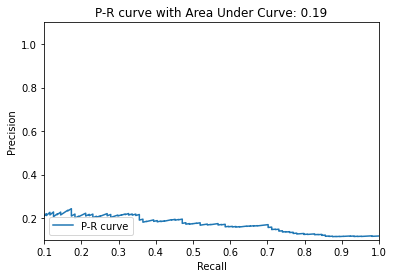

Decision Tree:
Tuned best Hyper Parameters: 
{'max_depth': 9, 'criterion': 'entropy'}

Accuracy on Training set: 0.908
Accuracy on Test set: 0.802

Confusion Matrix:
 [[688 113]
 [ 66  38]]

Classification Report:
                precision    recall  f1-score   support

          No       0.91      0.86      0.88       801
         Yes       0.25      0.37      0.30       104

    accuracy                           0.80       905
   macro avg       0.58      0.61      0.59       905
weighted avg       0.84      0.80      0.82       905



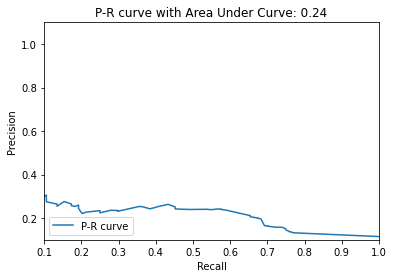

Random Forest:
Tuned best Hyper Parameters: 
{'oob_score': True, 'n_estimators': 100, 'max_features': 10, 'max_depth': 8, 'criterion': 'gini'}

Accuracy on Training set: 0.927
Accuracy on Test set: 0.836

Confusion Matrix:
 [[724  77]
 [ 71  33]]

Classification Report:
                precision    recall  f1-score   support

          No       0.91      0.90      0.91       801
         Yes       0.30      0.32      0.31       104

    accuracy                           0.84       905
   macro avg       0.61      0.61      0.61       905
weighted avg       0.84      0.84      0.84       905



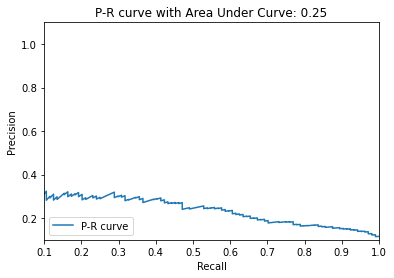

XGBoost:
Tuned best Hyper Parameters: 
{'n_estimators': 80, 'max_depth': 3, 'learning_rate': 0.44555555555555554}

Accuracy on Training set: 0.929
Accuracy on Test set: 0.840

Confusion Matrix:
 [[735  66]
 [ 79  25]]

Classification Report:
                precision    recall  f1-score   support

          No       0.90      0.92      0.91       801
         Yes       0.27      0.24      0.26       104

    accuracy                           0.84       905
   macro avg       0.59      0.58      0.58       905
weighted avg       0.83      0.84      0.84       905



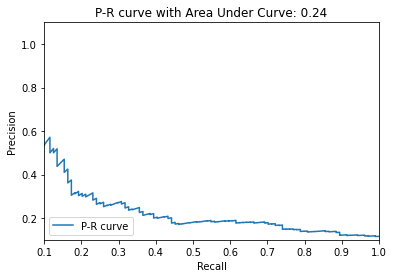

In [172]:
print('Summary for Hyper Parameters tuned models: \n')
tuned_models = models_tuned(x_train.values, y_train, x_test.values, y_test, models)

# due to binning, dataframe columns have these values in column names "[, ] or <"
# XGBoost is throwing error -> feature_names must be string, and may not contain [, ] or <
# hence passing the dataframe as arrays instead

__Observations on hyper parameter tuned models__: 
 - Improved on F1 scores for class of interest (Yes), however traded off with overall Accuracy score
 - Overfitting on all the models were controlled and the final tuned models were more generalized 
 - Considering the F1 score (precision and recall) for the class of interest, I find Logistic Regression to be the best fit

__Logistic Regression__: 

Baseline:
 - Accuracy on Training set: 0.889
 - Accuracy on Test set: 0.894

Classification Report:

                precision    recall  f1-score   support

          No       0.89      1.00      0.94       801
         Yes       0.83      0.10      0.17       104

Tuned:
 - Accuracy on Training set: 0.680
 - Accuracy on Test set: 0.661

Classification Report:

                precision    recall  f1-score   support

          No       0.92      0.67      0.78       801
         Yes       0.19      0.58      0.28       104

***************************************************************
__Decision Tree__: 

Baseline:
 - Accuracy on Training set: 0.999
 - Accuracy on Test set: 0.809

Classification Report:

                precision    recall  f1-score   support

          No       0.90      0.89      0.89       801
         Yes       0.20      0.22      0.21       104

Tuned: 
 - Accuracy on Training set: 0.896
 - Accuracy on Test set: 0.896

Classification Report:
                precision    recall  f1-score   support

          No       0.90      0.99      0.94       801
         Yes       0.68      0.18      0.29       104

***************************************************************
__Random Forest__: 

Baseline:
 - Accuracy on Training set: 0.999
 - Accuracy on Test set: 0.890

Classification Report:

                precision    recall  f1-score   support

          No       0.90      0.99      0.94       801
         Yes       0.57      0.15      0.24       104

Tuned:
 - Accuracy on Training set: 0.899
 - Accuracy on Test set: 0.894

Classification Report:

                precision    recall  f1-score   support
     	  No       0.90      0.99      0.94       801
         Yes       0.68      0.14      0.24       104
**************************************************************
__XGBoost__: 

Baseline:
 - Accuracy on Training set: 0.962
 - Accuracy on Test set: 0.884

Classification Report:

                precision    recall  f1-score   support

          No       0.90      0.98      0.94       801
         Yes       0.49      0.16      0.24       104

Tuned: 
 - Accuracy on Training set: 0.918
 - Accuracy on Test set: 0.895

Classification Report:

                precision    recall  f1-score   support

          No       0.90      0.99      0.94       801
         Yes       0.70      0.15      0.25       104
 

In [ ]:
model_base = LogisticRegression(random_state = 337, max_iter = 10000, C = 2)
model_base.fit(x_train, y_train)

#print('Accuracy on Training set: {:.3f}'.format(model_base.score(x_train, y_train)))
#print('Accuracy on Test set: {:.3f}'.format(model_base.score(x_test, y_test)))


threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]

#y_pred = model_base.predict(x_test)
y_pred_prob = model_base.predict_proba(x_test)[:, 1]
y_pred_prob_df = pd.DataFrame(y_pred_prob, columns = ['target'])

for threshold in threshold_list: 
    print ('\n******** For Threshold = {} ******'.format(threshold))
    y_pred_prob_df['target'] = y_pred_prob_df['target'].map(lambda x: 1 if x >= threshold else 0)
    y_pred = y_pred_prob_df['target'].values 
    report_metrics(y_test, y_pred, y_pred_prob)
    y_pred_prob_df['target'] = y_pred_prob

In [ ]:
print([estimator.tree_.max_depth for estimator in base_models[2].estimators_])

In [ ]:
[estimator.tree_.max_depth for estimator in base_models[3].estimators_]

In [ ]:
[i/10.0 for i in range(0,5)]